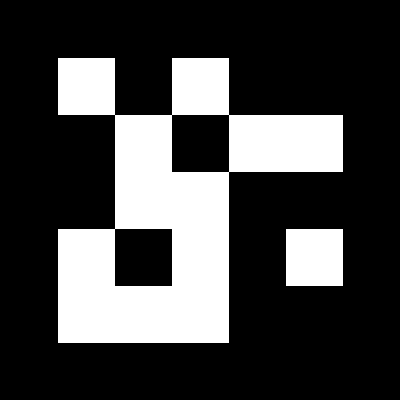

In [ ]:
import cv2 as cv
from cv2 import aruco
from google.colab.patches import cv2_imshow
import os

# dictionary to specify type of the marker
marker_dict = aruco.getPredefinedDictionary(aruco.DICT_5X5_250)

# MARKER_ID = 0
MARKER_SIZE = 400  # pixels

# Creating a directory to save markers
os.makedirs('markers', exist_ok=True)

# generating unique IDs using for loop
for id in range(20):  # generating 20 markers
    # using function to draw a marker
    marker_image = aruco.generateImageMarker(marker_dict, id, MARKER_SIZE)
    cv2_imshow(marker_image)
    cv.imwrite(f"markers/marker_{id}.png", marker_image)
    cv.waitKey(0)
    break


In [ ]:
import cv2 as cv
from cv2 import aruco
import numpy as np

# dictionary to specify type of the marker
marker_dict = aruco.getPredefinedDictionary(aruco.DICT_5X5_250)

# detect the marker
param_markers = aruco.DetectorParameters()

# utilizes default camera/webcam driver
cap = cv.VideoCapture(0)

# iterate through multiple frames, in a live video feed
while True:
    ret, frame = cap.read()
    if not ret:
        break
    # turning the frame to grayscale-only (for efficiency)
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    marker_corners, marker_IDs, reject = aruco.detectMarkers(
        gray_frame, marker_dict, parameters=param_markers
    )
    # getting conrners of markers
    if marker_corners:
        for ids, corners in zip(marker_IDs, marker_corners):
            cv.polylines(
                frame, [corners.astype(np.int32)], True, (0, 255, 255), 4, cv.LINE_AA
            )
            corners = corners.reshape(4, 2)
            corners = corners.astype(int)
            top_right = corners[0].ravel()
            top_left = corners[1].ravel()
            bottom_right = corners[2].ravel()
            bottom_left = corners[3].ravel()
            cv.putText(
                frame,
                f"id: {ids[0]}",
                top_right,
                cv.FONT_HERSHEY_PLAIN,
                1.3,
                (200, 100, 0),
                2,
                cv.LINE_AA,
            )
            # print(ids, "  ", corners)
    cv.imshow("frame", frame)
    key = cv.waitKey(1)
    if key == ord("q"):
        break
cap.release()
cv.destroyAllWindows()